In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import datetime
import obspy as op
import os
%matplotlib inline

First, load the original soil moisture dataset and interpolate so that each of the DAS files gets a soil moisture value

In [3]:
os.chdir("/home/rmartinshort/Documents/Berkeley/Fiber/data_test/Soil_moisture_predict")

In [4]:
soilM = pd.read_csv("Soil_moisture_rainfall.csv")

In [5]:
#Find the start of the soil experiment
stime = op.UTCDateTime(soilM['Daytime'][0])
#Determine time since start of the soil moisture dataset
soilM['tsince_start'] = soilM['Daytime'].apply(lambda x: op.UTCDateTime(x)-stime)

In [6]:
all_fnames = pd.read_csv('all_downsampled.dat',names=['file_name'])

In [7]:
all_fnames['Line'] = all_fnames['file_name'].apply(lambda x: x.split('_')[-1].split('.')[0])

In [8]:
all_fnames['Timestamp'] = all_fnames['file_name'].apply(lambda x: x.split('_')[0][2:])

In [9]:
all_fnames['DateTime'] = pd.to_datetime(all_fnames['Timestamp'])

In [10]:
all_fnames.sort_values(by='DateTime',ascending=True,inplace=True)

In [11]:
all_fnames.reset_index(drop=True,inplace=True)

In [12]:
#Find the time between the middle of each minute of DAS recording and the start of the 
#soil experiment
all_fnames['tsince_start'] = all_fnames['DateTime'].apply(lambda x: op.UTCDateTime(x)+30-stime)

In [13]:
all_fnames.head()

,file_name,Line,Timestamp,DateTime,tsince_start
0,./20160805180738_40_Hz_LineC,LineC,20160805180738,2016-08-05 18:07:38,21488.0
1,./20160805180738_40_Hz_LineCSN.mseed,LineCSN,20160805180738,2016-08-05 18:07:38,21488.0
2,./20160805180738_40_Hz_Line2EW.mseed,Line2EW,20160805180738,2016-08-05 18:07:38,21488.0
3,./20160805180738_40_Hz_Line2,Line2,20160805180738,2016-08-05 18:07:38,21488.0
4,./20160805180838_40_Hz_Line2EW.mseed,Line2EW,20160805180838,2016-08-05 18:08:38,21548.0


In [14]:
#Do the interpolation
X = np.array(soilM['tsince_start'])
for i in range(1,15):
    colname = soilM.columns[i]
    print(colname)
    newcolname = colname+'_interp'
    Y = np.array(soilM[colname])
    f = interpolate.interp1d(X,Y,kind='linear')
    all_fnames[newcolname] = f(np.array(all_fnames['tsince_start']))

M1_20_Avg
M2_20_Avg
M3_20_Avg
M4_10_Avg
M4_35_Avg
M5_20_Avg
M5_35_Avg
M6_20_Avg
M6_35_Avg
M7_20_Avg
M7_35_Avg
M8_20_Avg
M9_20_Avg
M9_35_Avg


In [15]:
all_fnames.to_csv('Fnames_soilM_interp.csv',index=False)

In [16]:
all_data = pd.read_csv("Fnames_soilM_interp.csv")

In [17]:
lineCSN = all_data[all_data['Line'] == "LineCSN"]
lineCSN.head()

,file_name,Line,Timestamp,DateTime,tsince_start,M1_20_Avg_interp,M2_20_Avg_interp,M3_20_Avg_interp,M4_10_Avg_interp,M4_35_Avg_interp,M5_20_Avg_interp,M5_35_Avg_interp,M6_20_Avg_interp,M6_35_Avg_interp,M7_20_Avg_interp,M7_35_Avg_interp,M8_20_Avg_interp,M9_20_Avg_interp,M9_35_Avg_interp
1,./20160805180738_40_Hz_LineCSN.mseed,LineCSN,20160805180738,2016-08-05 18:07:38,21488.0,0.581000,0.610560,0.202000,0.533,0.497813,0.318,0.410813,0.435,0.456,0.558187,0.562,0.311,0.417,0.495187
5,./20160805180838_40_Hz_LineCSN.mseed,LineCSN,20160805180838,2016-08-05 18:08:38,21548.0,0.581000,0.610260,0.202000,0.533,0.497913,0.318,0.410913,0.435,0.456,0.558087,0.562,0.311,0.417,0.495087
6,./20160805180938_40_Hz_LineCSN.mseed,LineCSN,20160805180938,2016-08-05 18:09:38,21608.0,0.580987,0.610027,0.202013,0.533,0.498000,0.318,0.410987,0.435,0.456,0.558000,0.562,0.311,0.417,0.494987
9,./20160805181038_40_Hz_LineCSN.mseed,LineCSN,20160805181038,2016-08-05 18:10:38,21668.0,0.580887,0.610227,0.202113,0.533,0.498000,0.318,0.410887,0.435,0.456,0.558000,0.562,0.311,0.417,0.494887
10,./20160805181138_40_Hz_LineCSN.mseed,LineCSN,20160805181138,2016-08-05 18:11:38,21728.0,0.580787,0.610427,0.202213,0.533,0.498000,0.318,0.410787,0.435,0.456,0.558000,0.562,0.311,0.417,0.494787


In [18]:
lineCSN_M3 = lineCSN[['file_name','DateTime','M3_20_Avg_interp','tsince_start']]

In [19]:
lineCSN_M3.reset_index(drop=True,inplace=True)

In [20]:
lineCSN_M3['DateTime'] = pd.to_datetime(lineCSN_M3['DateTime'])

/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
lineCSN_M3.set_index('DateTime',inplace=True)

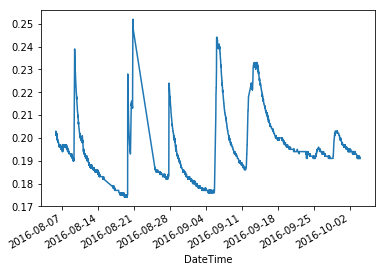

In [22]:
lineCSN_M3['M3_20_Avg_interp'].plot()

In [23]:
start = lineCSN_M3.index.searchsorted(datetime.datetime(2016,9,3))
end = lineCSN_M3.index.searchsorted(datetime.datetime(2016,9,10))
lineCSN_M3_clipped = lineCSN_M3[start:end]

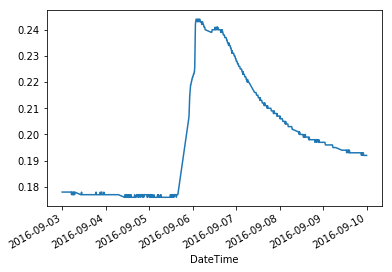

In [24]:
lineCSN_M3_clipped['M3_20_Avg_interp'].plot()

In [25]:
lineCSN_M3_clipped['gap'] = (lineCSN_M3_clipped['tsince_start'].diff())

/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
#There are some gaps in this data, but since its timestamped this probably won't affect the results too much
#otherwise the interpolation looks OK
lineCSN_M3_clipped[lineCSN_M3_clipped['gap'] != 60]

,file_name,M3_20_Avg_interp,tsince_start,gap
DateTime,,,,
2016-09-03 00:00:05,./20160903000005_40_Hz_LineCSN.mseed,0.178000,2461835.0,NaN
2016-09-03 03:42:05,./20160903034205_40_Hz_LineCSN.mseed,0.178000,2475155.0,120.0
2016-09-03 10:09:05,./20160903100905_40_Hz_LineCSN.mseed,0.177000,2498375.0,11400.0
2016-09-04 10:09:05,./20160904100905_40_Hz_LineCSN.mseed,0.176042,2584775.0,11400.0
2016-09-05 10:09:05,./20160905100905_40_Hz_LineCSN.mseed,0.176042,2671175.0,11400.0
2016-09-05 21:35:15,./20160905213515_40_Hz_LineCSN.mseed,0.204575,2712345.0,20770.0
2016-09-06 10:09:15,./20160906100915_40_Hz_LineCSN.mseed,0.239000,2757585.0,11400.0
2016-09-07 10:09:15,./20160907100915_40_Hz_LineCSN.mseed,0.216000,2843985.0,11400.0
2016-09-08 10:09:15,./20160908100915_40_Hz_LineCSN.mseed,0.201000,2930385.0,11400.0


In [27]:
len(lineCSN_M3_clipped)

8403

In [28]:
datadir = "/media/rmartinshort/My Book/4Robert"
import os
cwd = os.getcwd()
os.chdir(datadir)

In [29]:
fnames = list(lineCSN_M3_clipped['file_name'])

In [32]:
fnames

['./20160903000005_40_Hz_LineCSN.mseed',
 './20160903000105_40_Hz_LineCSN.mseed',
 './20160903000205_40_Hz_LineCSN.mseed',
 './20160903000305_40_Hz_LineCSN.mseed',
 './20160903000405_40_Hz_LineCSN.mseed',
 './20160903000505_40_Hz_LineCSN.mseed',
 './20160903000605_40_Hz_LineCSN.mseed',
 './20160903000705_40_Hz_LineCSN.mseed',
 './20160903000805_40_Hz_LineCSN.mseed',
 './20160903000905_40_Hz_LineCSN.mseed',
 './20160903001005_40_Hz_LineCSN.mseed',
 './20160903001105_40_Hz_LineCSN.mseed',
 './20160903001205_40_Hz_LineCSN.mseed',
 './20160903001305_40_Hz_LineCSN.mseed',
 './20160903001405_40_Hz_LineCSN.mseed',
 './20160903001505_40_Hz_LineCSN.mseed',
 './20160903001605_40_Hz_LineCSN.mseed',
 './20160903001705_40_Hz_LineCSN.mseed',
 './20160903001805_40_Hz_LineCSN.mseed',
 './20160903001905_40_Hz_LineCSN.mseed',
 './20160903002005_40_Hz_LineCSN.mseed',
 './20160903002105_40_Hz_LineCSN.mseed',
 './20160903002205_40_Hz_LineCSN.mseed',
 './20160903002305_40_Hz_LineCSN.mseed',
 './201609030024

In [37]:
#lets say we just want these traces - these are the traces surrounding probe M3
trace_start = 75
trace_end = 95

master_streams = []
for i in range(trace_start,trace_end):
    
    mstream = op.Stream()
    master_streams.append(mstream)

for mseed_file in fnames:

    f = op.read(mseed_file,format='mseed')
    #master_streams[1] += f[1]
    ##Take the relevant traces and append to mstreams
    j = 0
    for i in range(trace_start,trace_end):
        master_streams[j] += f[i]
        j += 1
        
        
    
    

In [38]:
master_streams

[8403 Trace(s) in Stream:

FB.00075.00.FON | 2016-09-03T00:00:05.298907Z - 2016-09-03T00:01:05.273907Z | 40.0 Hz, 2400 samples
...
(8401 other traces)
...
FB.00075.00.FON | 2016-09-09T23:59:14.337563Z - 2016-09-10T00:00:14.312563Z | 40.0 Hz, 2400 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces],
 8403 Trace(s) in Stream:

FB.00076.00.FON | 2016-09-03T00:00:05.298907Z - 2016-09-03T00:01:05.273907Z | 40.0 Hz, 2400 samples
...
(8401 other traces)
...
FB.00076.00.FON | 2016-09-09T23:59:14.337563Z - 2016-09-10T00:00:14.312563Z | 40.0 Hz, 2400 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces],
 8403 Trace(s) in Stream:

FB.00077.00.FON | 2016-09-03T00:00:05.298907Z - 2016-09-03T00:01:05.273907Z | 40.0 Hz, 2400 samples
...
(8401 other traces)
...
FB.00077.00.FON | 2016-09-09T23:59:14.337563Z - 2016-09-10T00:00:14.312563Z | 40.0 Hz, 2400 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces],
 8403 Trace(s) in Stream:

FB.0007

In [39]:
#Write to file
i = trace_start
for element in master_streams:
    outname = 'channel_%i_clipped.mseed' %i
    print(outname)
    element.write(outname,format='mseed')
    i += 1

channel_75_clipped.mseed
channel_76_clipped.mseed
channel_77_clipped.mseed
channel_78_clipped.mseed
channel_79_clipped.mseed
channel_80_clipped.mseed
channel_81_clipped.mseed
channel_82_clipped.mseed
channel_83_clipped.mseed
channel_84_clipped.mseed
channel_85_clipped.mseed
channel_86_clipped.mseed
channel_87_clipped.mseed
channel_88_clipped.mseed
channel_89_clipped.mseed
channel_90_clipped.mseed
channel_91_clipped.mseed
channel_92_clipped.mseed
channel_93_clipped.mseed
channel_94_clipped.mseed


In [40]:
os.system('mv channel_*_clipped.mseed %s' %cwd)

0

In [41]:
master_streams

[8403 Trace(s) in Stream:

FB.00075.00.FON | 2016-09-03T00:00:05.298907Z - 2016-09-03T00:01:05.273907Z | 40.0 Hz, 2400 samples
...
(8401 other traces)
...
FB.00075.00.FON | 2016-09-09T23:59:14.337563Z - 2016-09-10T00:00:14.312563Z | 40.0 Hz, 2400 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces],
 8403 Trace(s) in Stream:

FB.00076.00.FON | 2016-09-03T00:00:05.298907Z - 2016-09-03T00:01:05.273907Z | 40.0 Hz, 2400 samples
...
(8401 other traces)
...
FB.00076.00.FON | 2016-09-09T23:59:14.337563Z - 2016-09-10T00:00:14.312563Z | 40.0 Hz, 2400 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces],
 8403 Trace(s) in Stream:

FB.00077.00.FON | 2016-09-03T00:00:05.298907Z - 2016-09-03T00:01:05.273907Z | 40.0 Hz, 2400 samples
...
(8401 other traces)
...
FB.00077.00.FON | 2016-09-09T23:59:14.337563Z - 2016-09-10T00:00:14.312563Z | 40.0 Hz, 2400 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces],
 8403 Trace(s) in Stream:

FB.0007

In [44]:
#test merging facility
os.chdir(cwd)
tfile = op.read('channel_90_clipped.mseed',format='mseed')
#merge_test = tfile.merge(method=1,fill_value=np.nan)

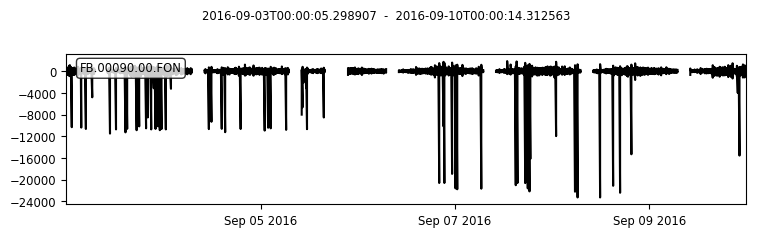

In [45]:
tfile.plot()

In [99]:
data = merge_test[0].data
#remove the median of the trace
median_non_nan = np.median(data[~np.isnan(data)])
data = data - median_non_nan
merge_test[0].data = data

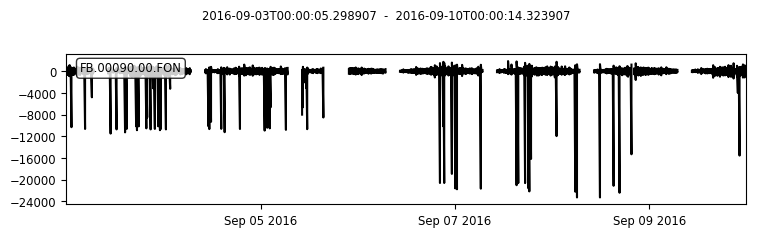

In [100]:
merge_test[0].plot()

In [106]:
def despike(trace,scale_factor=200):
    
    '''Remove all data whose amplitude is larger than scale factor x median of the non-nan parts of trace
    This follows the method of Bakku, 2010'''
    
    data = trace.data
    #determine the value above which a spike is declared
    cutoff = scale_factor*np.median(abs(data[~np.isnan(data)]))
    #This will produce a warning, but the nan values will remain nan
    data[abs(data) > cutoff] = np.nan
    trace.data = data
    
    return trace

    
    

In [102]:
trace = despike(merge_test[0].copy())

1249.0835886325185


/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater


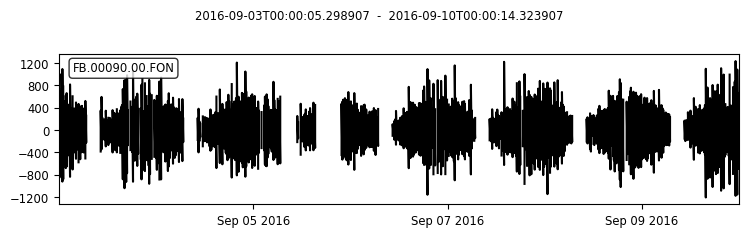

In [103]:
trace.plot()

In [104]:
trace = despike(trace)

1249.053557362166


/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater


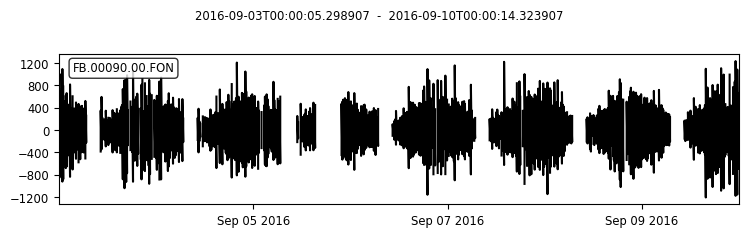

In [105]:
trace.plot()

In [90]:
merge_test.detrend('demean')
merge_test.detrend()

/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/obspy/signal/detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


1 Trace(s) in Stream:
FB.00090.00.FON | 2016-09-03T00:00:05.298907Z - 2016-09-10T00:00:14.323907Z | 40.0 Hz, 24192362 samples

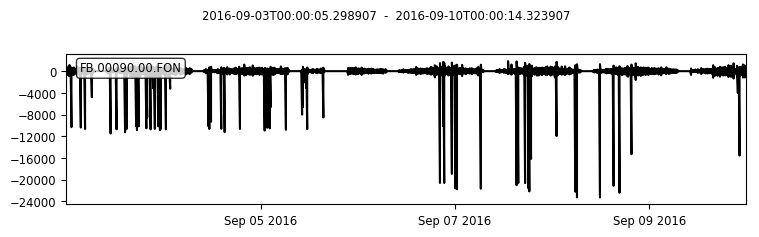

In [11]:
merge_test[0].plot()

In [210]:
m1 = merge_test[0].copy().filter('bandpass',freqmin=1,freqmax=5,zerophase=True)

In [10]:
import scipy.signal

In [ ]:
arr = scipy.signal.medfilt(merge_test[0].data,101)

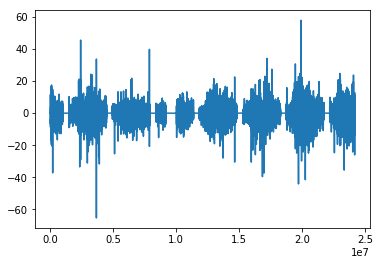

In [185]:
plt.plot(arr)

In [4]:
#Clearly the despiking worked, but we need to understand what its doing to the dataset
non_despiked = merge_test[0].data[:1000000]

(-1000, 1000)

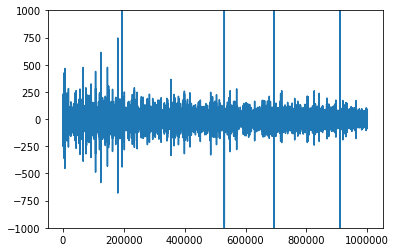

In [5]:
plt.plot(non_despiked)
plt.ylim(-1000,1000)

(-100, 100)

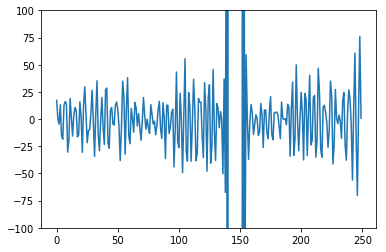

In [7]:
sp1 = non_despiked[530000:530250]
plt.plot(sp1)
plt.ylim(-100,100)

In [8]:
#Despike filtering appears to singificantly alter the signal, so we don't really want to do this
arr = scipy.signal.medfilt(sp1,5)

NameError: name 'scipy' is not defined

In [9]:
plt.plot(arr)
plt.ylim(-100,100)

NameError: name 'arr' is not defined

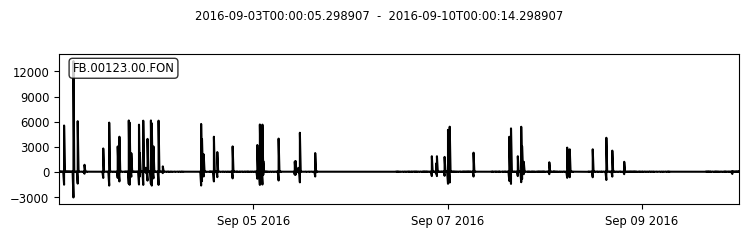

In [169]:
merge_test.plot(ymin=100,ymax=100)

In [11]:
sp1[abs(sp1) > 300] = 0

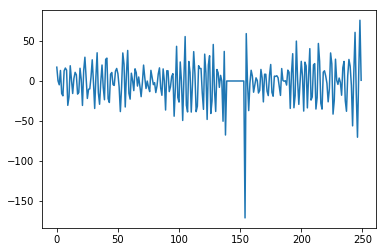

In [12]:
plt.plot(sp1)

In [107]:
tfile = op.read('channel_124_clipped.mseed',format='mseed')
merge_test = tfile.merge(method=1,fill_value=None)

In [108]:
data = merge_test[0].data
data[abs(data) > 1000] = 0 #simple method might just be to replace obviously bad data with NaN
merge_test[0].data = data

/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


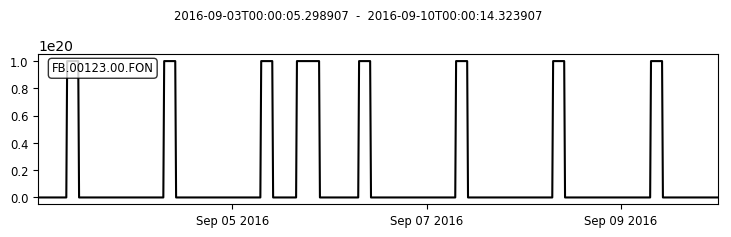

In [111]:
merge_test[0].plot()

In [85]:
m1 = merge_test[0].filter('lowpass',freq=0.0001)

2016-09-03T00:00:05.298907Z


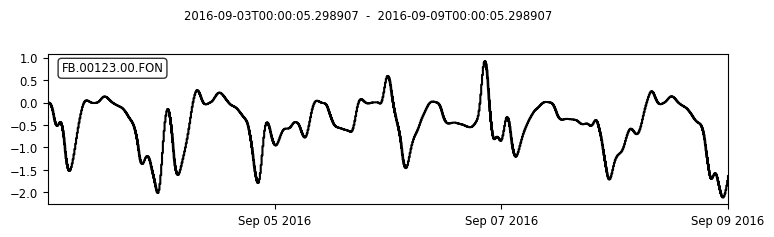

In [86]:
dt = m1.stats.starttime
print(dt)
m1.plot(starttime = dt, endtime = dt+(144*3600),number_of_ticks=4)